# 等間隔で並べた場合について調べる

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import json
from lib.ds2s_OV_x0 import ds2s_OV_x0
from lib.funcs import *

In [16]:
data = {}
for id, K in enumerate(range(101)):
	model = ds2s_OV_x0(
		L=10.0,
		K=K,
		n_0=5,
		x_0=0.1,
		v_0=0.7,
		dt=1.0,
		dx=0.1,
		x_init=np.array([10.0 / K * i for i in range(K)], dtype=np.float64),
		n_max=2010,
	)
	model.simulate()
	js = model.get_json()
	js["flow"] = { "1900 2000": model.flow(1900, 2000) }
	data[id] = js

In [17]:
density = [js["density"] for js in data.values()]
flow = [js["flow"]["1900 2000"] for js in data.values()]

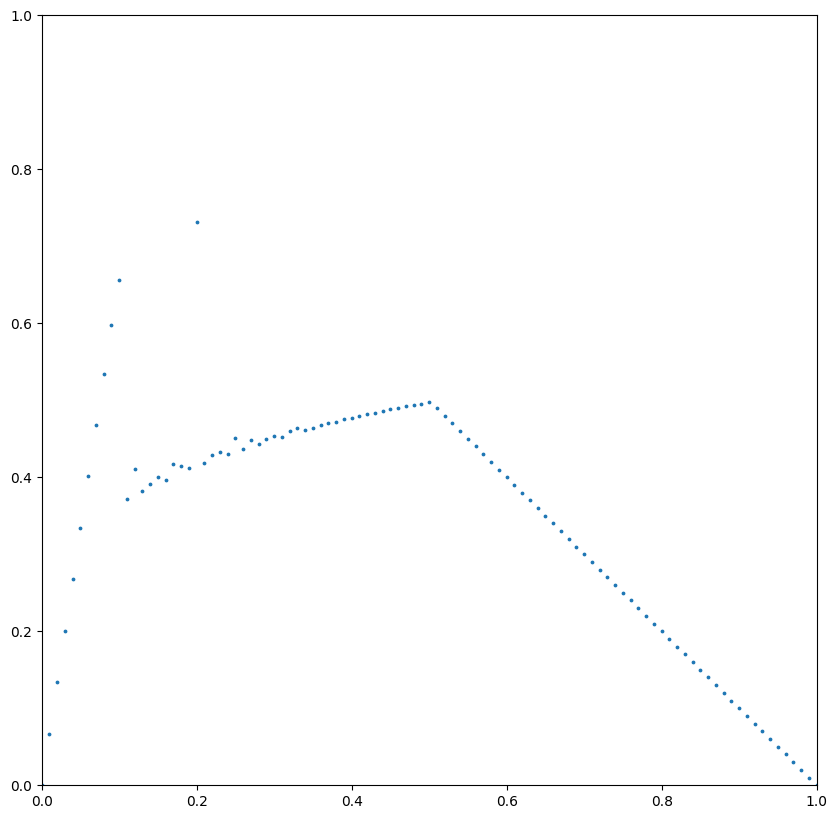

In [18]:
plot_fundamental(density, flow)

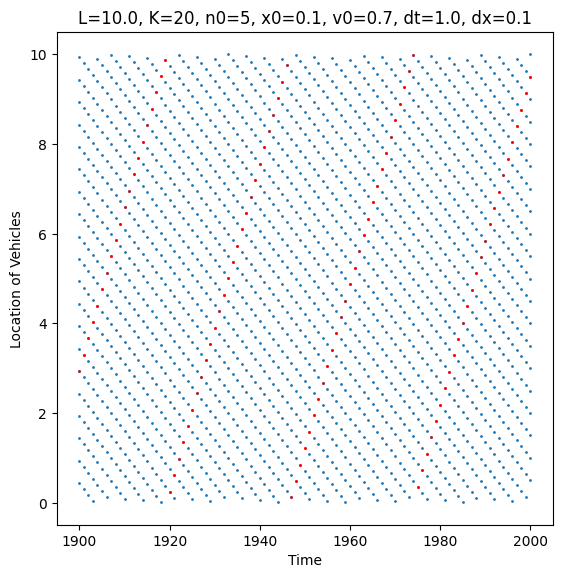

In [5]:
# flowが最大のモデルをプロット
model = ds2s_OV_x0.from_json(data[flow.index(max(flow))], n_max=2010)
model.simulate()
plot_pattern(model, 1900, 2000)

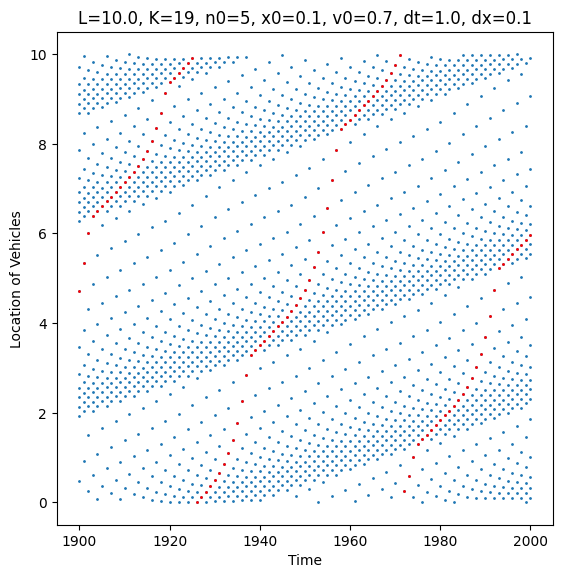

In [6]:
# そのひとつ前の、flowが小さい場所のシミュレーション
model = ds2s_OV_x0.from_json(data[flow.index(max(flow)) - 1], n_max=10000)
model.simulate()
plot_pattern(model, 1900, 2000)

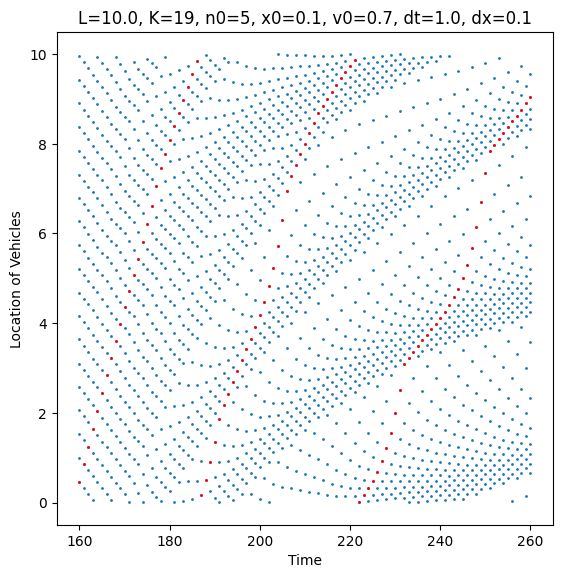

In [7]:
# 渋滞が発生するタイミングを描画
plot_pattern(model, 160, 260)

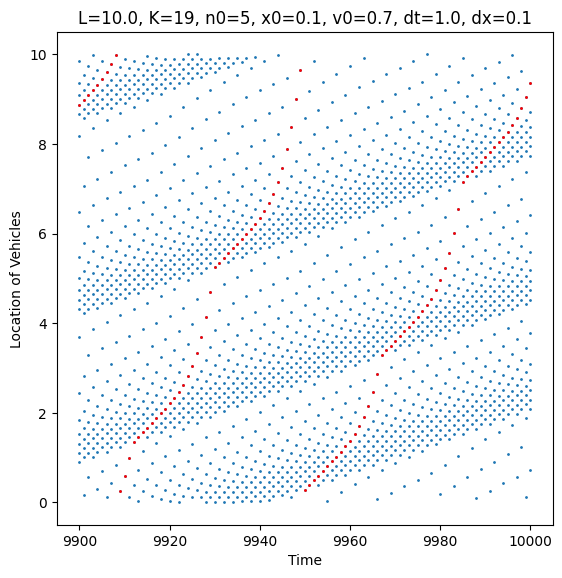

In [8]:
# 時間がもっと立った時
plot_pattern(model, 9900, 10000)

{'L': 10.0, 'K': 50, 'n_0': 5, 'x_0': 0.1, 'v_0': 0.7, 'dt': 1.0, 'dx': 0.1, 'x_init': [0.0, 0.2, 0.4, 0.6000000000000001, 0.8, 1.0, 1.2000000000000002, 1.4000000000000001, 1.6, 1.8, 2.0, 2.2, 2.4000000000000004, 2.6, 2.8000000000000003, 3.0, 3.2, 3.4000000000000004, 3.6, 3.8000000000000003, 4.0, 4.2, 4.4, 4.6000000000000005, 4.800000000000001, 5.0, 5.2, 5.4, 5.6000000000000005, 5.800000000000001, 6.0, 6.2, 6.4, 6.6000000000000005, 6.800000000000001, 7.0, 7.2, 7.4, 7.6000000000000005, 7.800000000000001, 8.0, 8.200000000000001, 8.4, 8.6, 8.8, 9.0, 9.200000000000001, 9.4, 9.600000000000001, 9.8], 'density': 0.5, 'flow': {'1900 2000': 0.4976700654305629}}


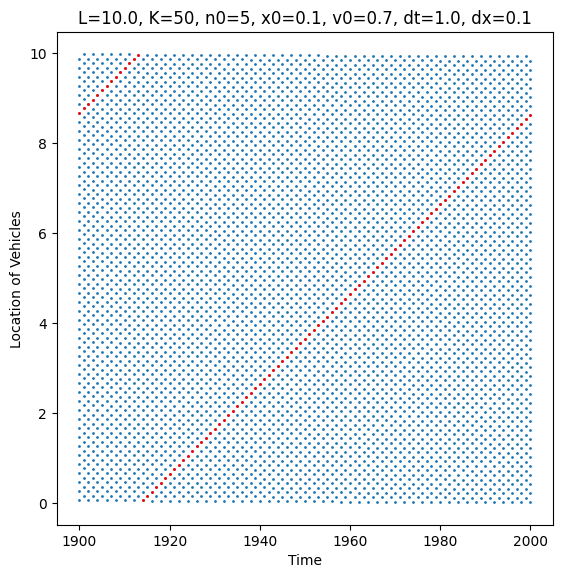

In [9]:
# 2個目のflowの極値
print(data[flow.index(max(flow[40:60]))])
model = ds2s_OV_x0.from_json(json=data[flow.index(max(flow[40:60]))], n_max=10000)
model.simulate()
plot_pattern(model, 1900, 2000)

{'L': 10.0, 'K': 75, 'n_0': 5, 'x_0': 0.1, 'v_0': 0.7, 'dt': 1.0, 'dx': 0.1, 'x_init': [0.0, 0.13333333333333333, 0.26666666666666666, 0.4, 0.5333333333333333, 0.6666666666666666, 0.8, 0.9333333333333333, 1.0666666666666667, 1.2, 1.3333333333333333, 1.4666666666666666, 1.6, 1.7333333333333334, 1.8666666666666667, 2.0, 2.1333333333333333, 2.2666666666666666, 2.4, 2.533333333333333, 2.6666666666666665, 2.8, 2.933333333333333, 3.0666666666666664, 3.2, 3.3333333333333335, 3.466666666666667, 3.6, 3.7333333333333334, 3.8666666666666667, 4.0, 4.133333333333333, 4.266666666666667, 4.4, 4.533333333333333, 4.666666666666667, 4.8, 4.933333333333334, 5.066666666666666, 5.2, 5.333333333333333, 5.466666666666667, 5.6, 5.733333333333333, 5.866666666666666, 6.0, 6.133333333333333, 6.266666666666667, 6.4, 6.533333333333333, 6.666666666666667, 6.8, 6.933333333333334, 7.066666666666666, 7.2, 7.333333333333333, 7.466666666666667, 7.6, 7.733333333333333, 7.866666666666666, 8.0, 8.133333333333333, 8.2666666

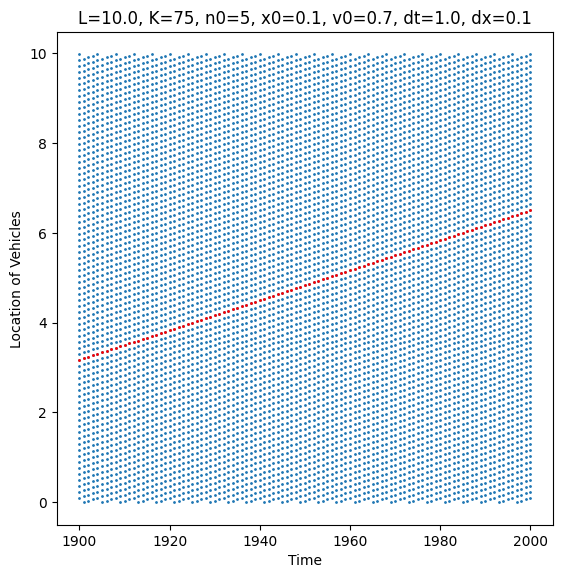

In [10]:
# 2個目のflowの極値
print(data[75])
model = ds2s_OV_x0.from_json(json=data[75], n_max=10000)
model.simulate()
plot_pattern(model, 1900, 2000)

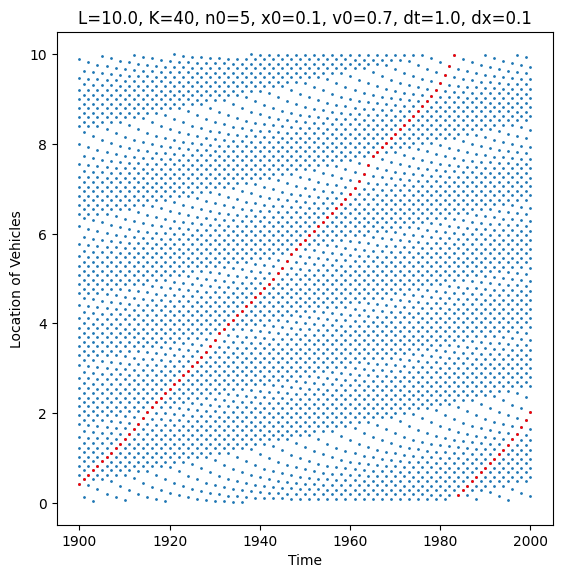

In [19]:
# flowが最大のモデルをプロット
model = ds2s_OV_x0.from_json(data[40], n_max=2010)
model.simulate()
plot_pattern(model, 1900, 2000)

In [11]:
# 速度を落としてみる
data = {}
for id, K in enumerate(range(101)):
	model = ds2s_OV_x0(
		L=10.0,
		K=K,
		n_0=5,
		x_0=0.1,
		v_0=0.1,
		dt=1.0,
		dx=0.1,
		x_init=np.array([10.0 / K * i for i in range(K)], dtype=np.float64),
		n_max=2010,
	)
	model.simulate()
	js = model.get_json()
	js["flow"] = { "1900 2000": model.flow(1900, 2000) }
	data[id] = js

In [12]:
density = [js["density"] for js in data.values()]
flow = [js["flow"]["1900 2000"] for js in data.values()]

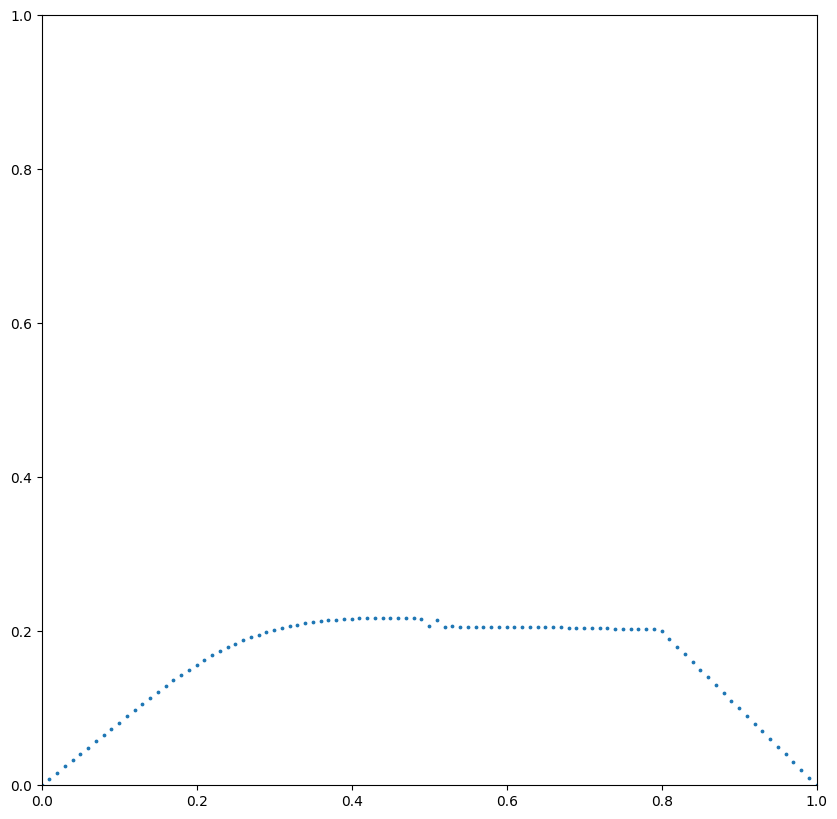

In [13]:
plot_fundamental(density, flow)

In [14]:
data = {}
for id, K in enumerate(range(101)):
	model = ds2s_OV_x0(
		L=10.0,
		K=K,
		n_0=5,
		x_0=0.1,
		v_0=0.7,
		dt=1.0,
		dx=0.1,
		x_init=np.array([10.0 / K * i for i in range(K)], dtype=np.float64),
		n_max=2010,
	)
	model.simulate()
	js = model.get_json()
	js["flow"] = { "50 100": model.flow(50, 100) }
	data[id] = js

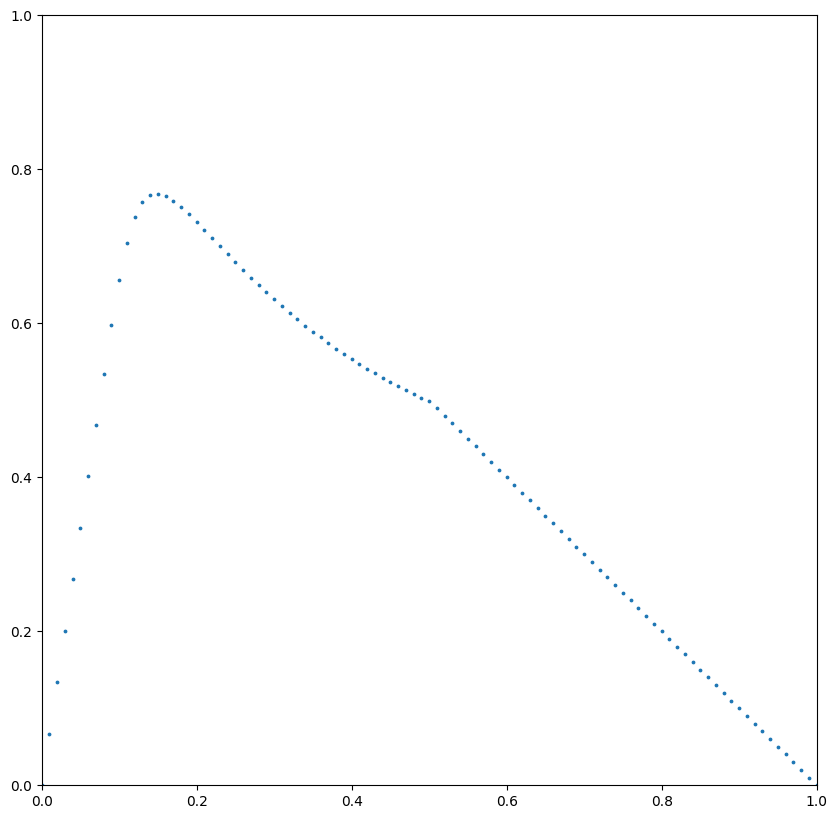

In [15]:
density = [js["density"] for js in data.values()]
flow = [js["flow"]["50 100"] for js in data.values()]
plot_fundamental(density, flow)